## Getting Started with Jupyter Notebooks

------------------------------------------------------------------------
#### Andy Monaghan (andrew.monaghan@colorado.edu)
#### Center for Research Data and Digital Scholarship, Research Computing
#### University of Colorado Boulder
#### September 17, 2020
------------------------------------------------------------------------

__Acknowledgements:__
* Brett Shouse (CU Research Computing)
* https://www.dataquest.io/blog/jupyter-notebook-tutorial/
* https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
----

#### [Jupyter notebooks](https://jupyter.org/) are an excellent resource for interactive development and data analysis using Python, R, and other languages. Jupyter notebooks can contain live code, equations, visualizations, and explanatory text which provide an excellent enviornment to use, learn, and teach interactive data analysis.  

----

__Learning Objectives:__
* Overview
* Hands-on exercises to become familiar with
    * Layout of JupyterLab interface
    * Layout of Notebooks
    * Markdown 
    * Coding
    * Shortcuts
    * Viewing data and making graphs
    * Saving and exporting notebooks
-----------------------------

### Let's get started!

#### In your browser, navigate to https://jupytertraining.rc.colorado.edu

* Choose the `Signup!` option
* Provide a username and password (this is temporary -- choose an easy password that you don't use otherwise)
* ....wait a moment -- I will approve your account in the administrative portal.
* ....Okay -- now choose the `Login!` option and sign in with your new username and password
    * if successful you will be logged into the Jupyterlab inteface
    
    <p align="middle">
  <img src="./jhscreenshot.png"/>
</p>

___

### Familiarize yourself with JupyterLab
* _Left sidebar:_ Click on a tab to change what you see in the left menu bar.  Options include the file browser, a list of running kernels and terminals, a command palette, a notebook cell tools inspector, and a tabs list.
* _Left menu bar:_ 
  * The _file browser_ will be active when you log in. 
    * You can navigate to your other directories here.
    * To open an existing notebook, just click on the notebook name in the file browser (e.g., _mynotebook.ipynb_).
    * Above your working directory contents are buttons to add a new Launcher, create a new folder, upload files from your local computer, and refresh the working directory. 
* _Main Work Area:_ Your workspaces will be in this large area on the right hand side. Under the "Launcher" tab you can: 
  * Open a new notebook with any of the kernels listed:
      * __Python 3: Python3 notebook (Intel Python distribution)
      * ...and any other custom kernels you [add on your own](https://test-jupyter.readthedocs.io/en/doc-events/install-kernel.html) 
   * Open a new console (command line) for any of the kernels.
   * Open other functions; the "Terminal" function is particularly useful, as it enables you to access the command line on the Summit or Blanca node your Jupyterhub job is currently running on. 
* See Jupyter's [documentation on the JupyterLab Interface for additional information.](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)
----

### Open our tutorial notebook
* click on the "Terminal" option in the _JupyterLab_ interface
* in the terminal, clone this repository:
  * git clone https://github.com/CU-Boulder-CRDDS/jupyter_fall2020
* go back to the JupyterLab interface, navigate to the new "jupyter_fall2020" folder, and open _jhcrdds.ipynb_
---

### Markdown


```
# This is a level 1 heading

## This is a level 2 heading

This is some plain text that forms a paragraph. 

Add emphasis via **bold** and __bold__, 

or *italic* and _italic_. 

Paragraphs must be separated by an empty line. 

* Sometimes we want to include lists. 
* Which can be bulleted using asterisks. 

1. Lists can also be numbered. 
2. If we want an ordered list.

[It is possible to include hyperlinks](https://www.colorado.edu)

Inline code uses single backticks: `foo()`, and code blocks use triple backticks

    
And finally, adding images is easy: 

![Alt text](https://www.colorado.edu/cubequest/profiles/express/themes/ucb/images/cu-boulder-logo-text-black.svg)
```

_Now paste the text above into the cell below and see what happens_

_And practice by adding some of your own text in the following cell_

---
### Working with data

_Run the following cell to load the python packages needed to complete the exercises_

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time

print("Hello CU -- I'm ready to go!")

Hello CU -- I'm ready to go!


_Now run the following cell to create your first image!_

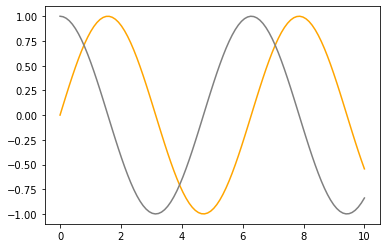

In [23]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), color="orange")
plt.plot(x, np.cos(x), color="grey")

plt.show()

_now paste the text from the cell above into the cell below and change the color of the plot to "red" and "blue" lines_

_Now run the following cell to save the image_

In [4]:
plt.savefig('my_figure.png')

<Figure size 432x288 with 0 Axes>

_Now lets load a dataset from a file - run the following cell_

In [6]:
%%time
#df = pd.read_csv('jupyter_fall2020/fortune500.csv')
df=pd.read_csv('https://s3.amazonaws.com/dq-blog-files/fortune500.csv')

_Now run the following cells to get a quick feel for the data_

In [7]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [8]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [9]:
len(df)

25500

_Now change the name of the columns to ease plotting_

In [26]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

NameError: name 'df' is not defined

_Now run the following cell to plot the Fortune 500 revenues over time_

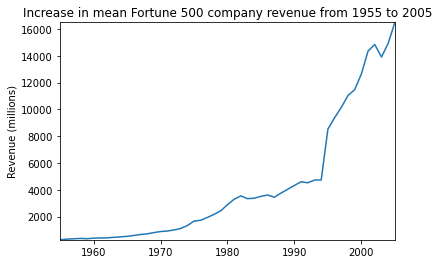

In [11]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.revenue
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company revenue from 1955 to 2005', 'Revenue (millions)')

### Shortcuts
* `CTRL+Enter` to run a cell
* `Esc` will take you into command mode where you can navigate around your notebook with arrow keys. While in command mode:
    * `A` to insert a new cell above the current cell, B to insert a new cell below.
    * `M` to change the current cell to Markdown, Y to change it back to code
    * `D + D` (press the key twice) to delete the current cell
* Enter will take you from command mode back into edit mode for the given cell.

[More shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)

### Summary

* Please let us know how we are doing!: http://tinyurl.com/curc-survey18
* Contact: rc-help@colorado.edu or andrew.monaghan@colorado.edu

* Download Anaconda to use Jupyter on your laptop/desktop: https://www.anaconda.com
---


### Other resources
  * [Download Anaconda - to use Jupyter on your laptop/desktop](https://www.anaconda.com)
  * [Jupyter notebooks - main page](https://jupyter.org)
  * [CURC JupyterHub - use Jupyter notebooks on RC resources](https://curc.readthedocs.io/en/latest/gateways/jupyterhub.html) 
  * [Beginners tutorial - by dataquest](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) 
